# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#from datetime import date
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    city_url = url+city
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
        city_weather = requests.get(city_url).json()
       
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
       
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | sambava
Processing Record 4 of Set 1 | lihue
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | tolanaro
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | port lincoln
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | aasiaat
Processing Record 17 of Set 1 | kataragama
City not found. Skipping...
Processing Record 18 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 19 of Set 1 | ocos
Processing Record 20 of Set 1 | lompoc
Processing Record 21 of Set 1 

Processing Record 41 of Set 4 | mikhaylovsk
Processing Record 42 of Set 4 | palmer
Processing Record 43 of Set 4 | kedougou
Processing Record 44 of Set 4 | cargados carajos
City not found. Skipping...
Processing Record 45 of Set 4 | hithadhoo
Processing Record 46 of Set 4 | lazaro cardenas
Processing Record 47 of Set 4 | sola
Processing Record 48 of Set 4 | anloga
Processing Record 49 of Set 4 | el granada
Processing Record 0 of Set 5 | bemidji
Processing Record 1 of Set 5 | la foa
Processing Record 2 of Set 5 | mulanje
Processing Record 3 of Set 5 | callao
Processing Record 4 of Set 5 | pemangkat
Processing Record 5 of Set 5 | chifeng
Processing Record 6 of Set 5 | ellsworth
Processing Record 7 of Set 5 | tyumen
Processing Record 8 of Set 5 | rosso
Processing Record 9 of Set 5 | souillac
Processing Record 10 of Set 5 | balabac
Processing Record 11 of Set 5 | codrington
Processing Record 12 of Set 5 | bayanhongor
Processing Record 13 of Set 5 | ugoofaaru
Processing Record 14 of Set 5 |

Processing Record 33 of Set 8 | novyy urengoy
Processing Record 34 of Set 8 | lakhnadon
Processing Record 35 of Set 8 | brezina
Processing Record 36 of Set 8 | kenora
Processing Record 37 of Set 8 | gotsucho
Processing Record 38 of Set 8 | sarikei
Processing Record 39 of Set 8 | kapa'a
Processing Record 40 of Set 8 | ketchikan
Processing Record 41 of Set 8 | luanda
Processing Record 42 of Set 8 | bafata
Processing Record 43 of Set 8 | puerto baquerizo moreno
Processing Record 44 of Set 8 | saint-georges
Processing Record 45 of Set 8 | daudnagar
Processing Record 46 of Set 8 | santana
Processing Record 47 of Set 8 | akureyri
Processing Record 48 of Set 8 | portland
Processing Record 49 of Set 8 | baiti
Processing Record 0 of Set 9 | yaren
Processing Record 1 of Set 9 | ko lanta
Processing Record 2 of Set 9 | coahuayana de hidalgo
Processing Record 3 of Set 9 | idfu
Processing Record 4 of Set 9 | simenqian
Processing Record 5 of Set 9 | pingxiang
Processing Record 6 of Set 9 | belalcazar

Processing Record 24 of Set 12 | uhrichsville
Processing Record 25 of Set 12 | namie
Processing Record 26 of Set 12 | vila franca do campo
Processing Record 27 of Set 12 | posto fiscal rolim de moura
Processing Record 28 of Set 12 | tarfaya
Processing Record 29 of Set 12 | pangody
Processing Record 30 of Set 12 | tucuma
Processing Record 31 of Set 12 | canutama
Processing Record 32 of Set 12 | johns creek
Processing Record 33 of Set 12 | rabo de peixe
Processing Record 34 of Set 12 | shima
Processing Record 35 of Set 12 | muriti
Processing Record 36 of Set 12 | cotui
Processing Record 37 of Set 12 | gulu
Processing Record 38 of Set 12 | san pedro pochutla
Processing Record 39 of Set 12 | cairns city
City not found. Skipping...
Processing Record 40 of Set 12 | sungai penuh
Processing Record 41 of Set 12 | kavieng
Processing Record 42 of Set 12 | quzhou
Processing Record 43 of Set 12 | esperantina
Processing Record 44 of Set 12 | shitanjing
Processing Record 45 of Set 12 | carutapera
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame.from_records(city_data)
# # Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,20.77,61,100,4.56,PN,1689079883
1,port elizabeth,-33.9180,25.5701,17.40,61,75,4.63,ZA,1689079883
2,sambava,-14.2667,50.1667,24.93,76,37,4.35,MG,1689079724
3,lihue,21.9789,-159.3672,25.77,81,100,5.66,US,1689079884
4,blackmans bay,-43.0167,147.3167,11.50,77,100,3.23,AU,1689079885


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,20.77,61,100,4.56,PN,1689079883
1,port elizabeth,-33.9180,25.5701,17.40,61,75,4.63,ZA,1689079883
2,sambava,-14.2667,50.1667,24.93,76,37,4.35,MG,1689079724
3,lihue,21.9789,-159.3672,25.77,81,100,5.66,US,1689079884
4,blackmans bay,-43.0167,147.3167,11.50,77,100,3.23,AU,1689079885


In [8]:
#Converting to date
df=pd.DataFrame()
df['date'] = pd.to_datetime(city_data_df['Date'], unit="s")
date=df['date'][0].strftime("%Y-%m-%d")

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

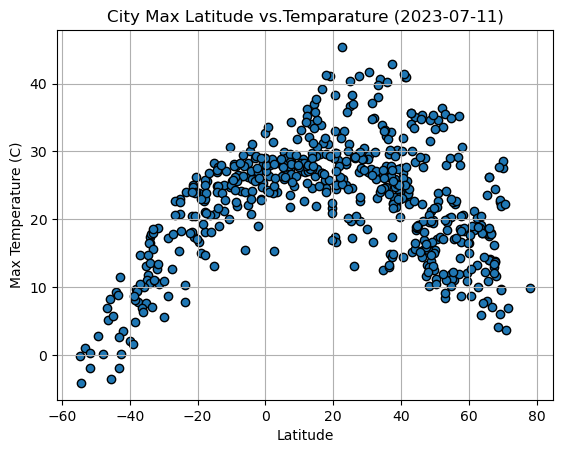

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

x1=city_data_df['Lat']
y1=city_data_df['Max Temp']

plt.scatter(x1,y1,edgecolor='black')

# Incorporate the other graph properties
# YOUR CODE HERE

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
title1=f"City Max Latitude vs.Temparature ({date})"
plt.title(title1)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

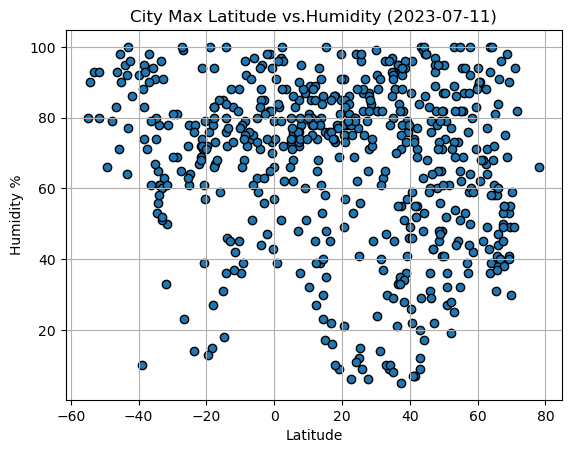

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

x2=city_data_df['Lat']
y2=city_data_df['Humidity']

plt.scatter(x2,y2,edgecolor='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
title2=f"City Max Latitude vs.Humidity ({date})"
plt.title(title2)
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

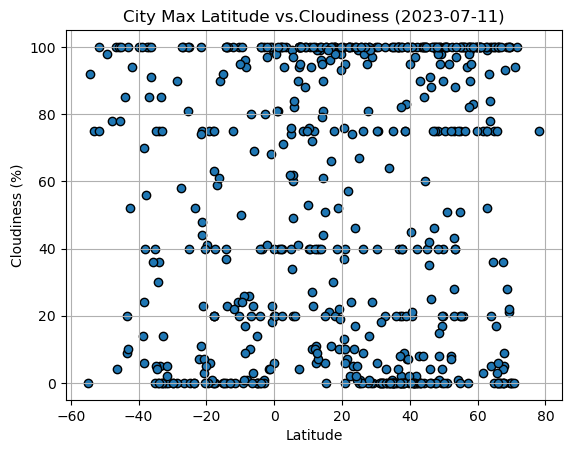

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x3=city_data_df['Lat']
y3=city_data_df['Cloudiness']

plt.scatter(x3,y3,edgecolor='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
title3=f"City Max Latitude vs.Cloudiness ({date})"
plt.title(title3)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

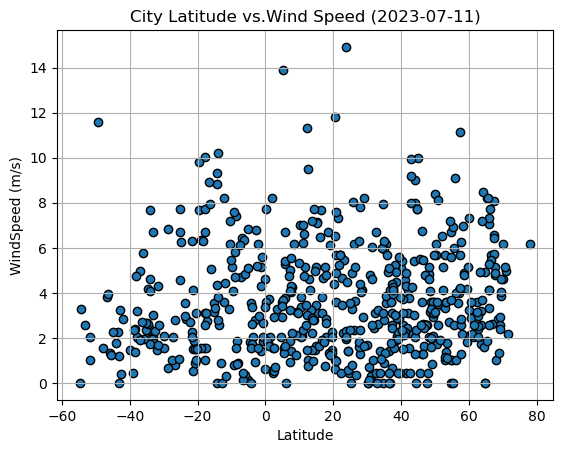

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x4=city_data_df['Lat']
y4=city_data_df['Wind Speed']

plt.scatter(x4,y4,edgecolor='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("WindSpeed (m/s)")
title4=f"City Latitude vs.Wind Speed ({date})"
plt.title(title4)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def l_reg(x,y):
    
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    line = slope*x+intercept
    plt.plot(x, line, 'r')
    line_eq='y={:.2f}x+{:.2f}'.format(slope,intercept)
    print("The r-value is ",r_value)
   
    return line_eq


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df=pd.DataFrame(city_data_df.loc[city_data_df["Lat"]>=0]).reset_index()

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,3,lihue,21.9789,-159.3672,25.77,81,100,5.66,US,1689079884
1,13,iqaluit,63.7506,-68.5145,5.85,100,100,2.57,CA,1689079742
2,14,olonkinbyen,70.9221,-8.7187,3.68,94,94,4.98,SJ,1689079890
3,15,aasiaat,68.7098,-52.8699,4.09,98,100,2.83,GL,1689079890
4,16,ocos,14.5094,-92.1933,26.39,86,81,1.46,GT,1689079892


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df=pd.DataFrame(city_data_df.loc[city_data_df["Lat"]<0]).reset_index()
# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,adamstown,-25.0660,-130.1015,20.77,61,100,4.56,PN,1689079883
1,1,port elizabeth,-33.9180,25.5701,17.40,61,75,4.63,ZA,1689079883
2,2,sambava,-14.2667,50.1667,24.93,76,37,4.35,MG,1689079724
3,4,blackmans bay,-43.0167,147.3167,11.50,77,100,3.23,AU,1689079885
4,5,port-aux-francais,-49.3500,70.2167,2.86,66,98,11.57,TF,1689079885


###  Temperature vs. Latitude Linear Regression Plot

The r-value is  -0.5387016061382093


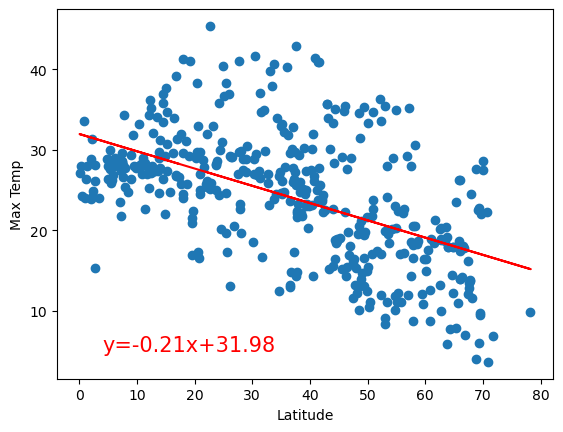

In [16]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
lat_x=northern_hemi_df['Lat']
temp_y=northern_hemi_df['Max Temp']

plt.scatter(lat_x,temp_y)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
line_eq=l_reg(lat_x,temp_y)
plt.annotate(line_eq,(4,5),fontsize=15,color="red")

plt.show()


The r-value is  0.8876520817206658


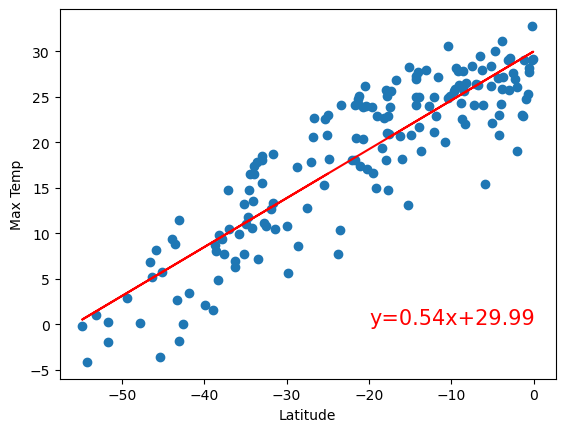

In [17]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
lat_x=southern_hemi_df['Lat']
temp_y=southern_hemi_df['Max Temp']

plt.scatter(lat_x,temp_y)
line_eq=l_reg(lat_x,temp_y)

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(-20,0),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# Southern Hemisphere have got positive slope and Northern Hemisphere have got negative slope.
# In this liner regression as the latitude gives up towards equator the temparature is increasing,
# and again if the latitude increases from the equator to northern hemisphere the temparature is decreasing. 
# so we can see that the latitudes around the equator have maximum temparature on this particular day. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is  -0.11885710421243084


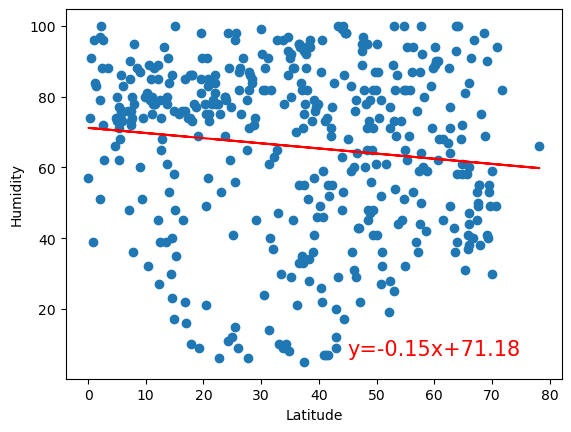

In [20]:
# Northern Hemisphere
# YOUR CODE HERE
lat_x=northern_hemi_df['Lat']
temp_y=northern_hemi_df['Humidity']

plt.scatter(lat_x,temp_y)
line_eq=l_reg(lat_x,temp_y)

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(45,7),fontsize=15,color="red")
plt.show()

The r-value is  -0.13734442449425657


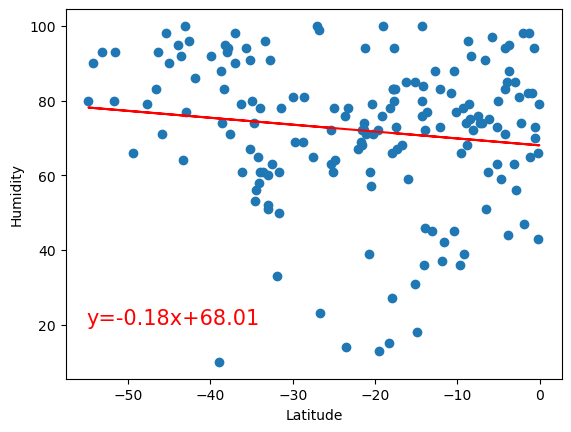

In [19]:
# Southern Hemisphere
# YOUR CODE HERE
lat_x=southern_hemi_df['Lat']
temp_y=southern_hemi_df['Humidity']

plt.scatter(lat_x,temp_y)
line_eq=l_reg(lat_x,temp_y)

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# Both Southern and Northern Hemisphere have got negative slopes.
# In this liner regression as the latitude gives up towards southern to Northern Hemisphere the humidity is decreasing.
# As the Latitude increases the humidity decreases. 
# So Southern Hemisphere is more humid than Northern Hemisphere on this particular day. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is  -0.034380685530336505


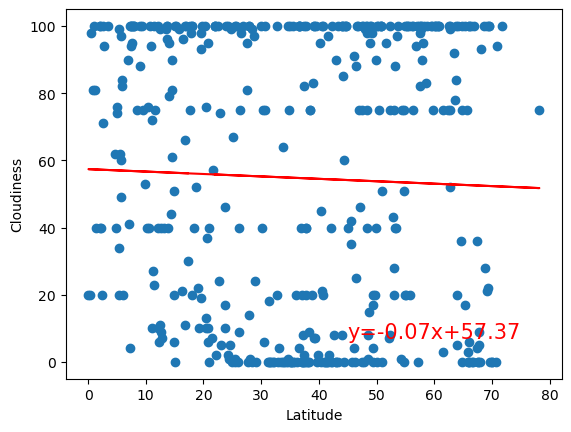

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
lat_x=northern_hemi_df['Lat']
temp_y=northern_hemi_df['Cloudiness']

plt.scatter(lat_x,temp_y)
line_eq=l_reg(lat_x,temp_y)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(45,7),fontsize=15,color="red")
plt.show()

The r-value is  0.06725442701192885


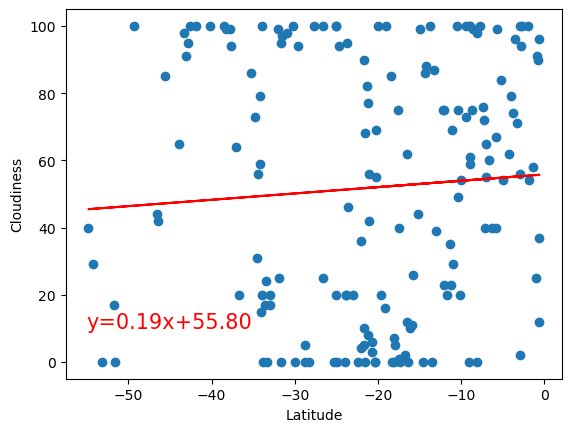

In [157]:
# Southern Hemisphere
# YOUR CODE HERE
lat_x=southern_hemi_df['Lat']
temp_y=southern_hemi_df['Cloudiness']

plt.scatter(lat_x,temp_y)
line_eq=l_reg(lat_x,temp_y)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# Southern Hemisphere have got positive slope and Northern Hemisphere have got negative slope.
# In this liner regression as the latitude gives up towards equator the cloudiness is increasing,
# and again if the latitude increases from equator to northern hemisphere the cloudiness is decreasing. 
# so we can see that the latitudes around the equator are more cloudy on this particular day. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is  0.06352085700521917


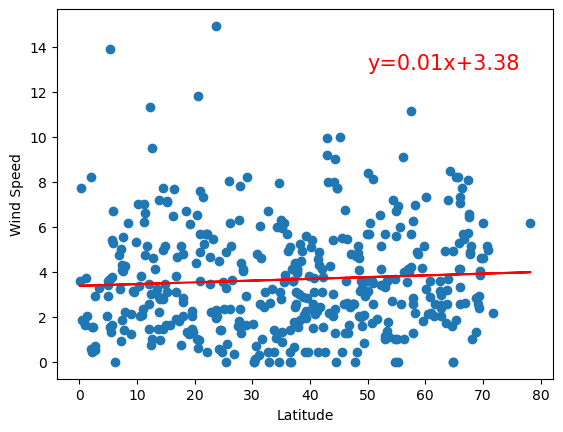

In [22]:
# Northern Hemisphere
# YOUR CODE HERE
lat_x=northern_hemi_df['Lat']
temp_y=northern_hemi_df['Wind Speed']

plt.scatter(lat_x,temp_y)
line_eq=l_reg(lat_x,temp_y)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(50,13),fontsize=15,color="red")
plt.show()

The r-value is  0.15193645649177037


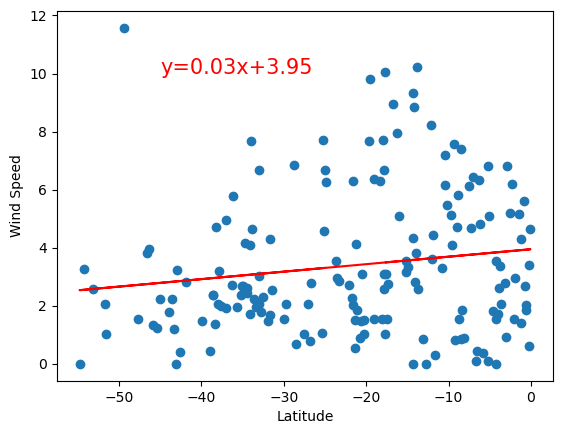

In [30]:
# Southern Hemisphere
# YOUR CODE HERE
lat_x=southern_hemi_df['Lat']
temp_y=southern_hemi_df['Wind Speed']

plt.scatter(lat_x,temp_y)
line_eq=l_reg(lat_x,temp_y)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(-45,10),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# Here the slopes are positive and increasing in both southern and northern hemisphere. 
# In this linear regression as the latitude gives up towards equator the wind speed also increasing.
# So the southern hemisphere is less windy than northern hemisphere.
# The windspeed is quite steady in northern hemisphere as the slope value is 0.01 which is closer to zero. 
# As the latitude increases the wind speed is also increasing on this particular day.